In [1]:
#!pip install chemprop
# !pip install rdkit-pypi 

In [2]:
#pip show chemprop

In [3]:
#import chemprop

In [4]:
#pip install rdkit-pypi

In [5]:
#!apt install subversion 

In [6]:
import chemprop
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.decomposition import PCA

C:\Users\warun\AppData\Roaming\Python\Python310\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [7]:
def plot_parity(y_true, y_pred, y_pred_unc=None):
    
    axmin = min(min(y_true), min(y_pred)) - 0.1*(max(y_true)-min(y_true))
    axmax = max(max(y_true), max(y_pred)) + 0.1*(max(y_true)-min(y_true))
    
    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    
    plt.plot([axmin, axmax], [axmin, axmax], '--k')

    plt.errorbar(y_true, y_pred, yerr=y_pred_unc, linewidth=0, marker='o', markeredgecolor='w', alpha=1, elinewidth=1)
    
    plt.xlim((axmin, axmax))
    plt.ylim((axmin, axmax))
    
    ax = plt.gca()
    ax.set_aspect('equal')
    
    at = AnchoredText(
    f"MAE = {mae:.2f}\nRMSE = {rmse:.2f}", prop=dict(size=10), frameon=True, loc='upper left')
    at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
    ax.add_artist(at)
    
    plt.xlabel('True')
    plt.ylabel('Chemprop Predicted')
    
    plt.show()
    
    return

In [12]:
arguments = [
    '--data_path', 'tests/regression.csv',
    '--dataset_type', 'regression',
    '--save_dir', 'test_checkpoints_reg1',
    '--epochs', '10',
    '--save_smiles_splits'
]

args = chemprop.args.TrainArgs().parse_args(arguments)
mean_score, std_score = chemprop.train.cross_validate(args=args, train_func=chemprop.train.run_training)

Command line
python c:\Users\warun\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py --ip=127.0.0.1 --stdin=9003 --control=9001 --hb=9000 --Session.signature_scheme="hmac-sha256" --Session.key=b"f1831808-d798-429d-883d-bf8d0f121823" --shell=9002 --transport="tcp" --iopub=9004 --f=c:\Users\warun\AppData\Roaming\jupyter\runtime\kernel-v2-12976E2P5EkouoPeh.json
Args
{'activation': 'ReLU',
 'adding_bond_types': True,
 'adding_h': False,
 'aggregation': 'mean',
 'aggregation_norm': 100,
 'atom_constraints': [],
 'atom_descriptor_scaling': True,
 'atom_descriptors': None,
 'atom_descriptors_path': None,
 'atom_descriptors_size': 0,
 'atom_features_size': 0,
 'atom_messages': False,
 'atom_targets': [],
 'batch_size': 50,
 'bias': False,
 'bias_solvent': False,
 'bond_constraints': [],
 'bond_descriptor_scaling': True,
 'bond_descriptors': None,
 'bond_descriptors_path': None,
 'bond_descriptors_size': 0,
 'bond_features_size': 0,
 'bond_targets': [],
 'cache_cutoff': 10000,
 

# Predict from file

In [24]:
arguments = [
    '--test_path', 'test_checkpoints_reg1/fold_0/test_smiles.csv',
    '--preds_path', 'test_preds_reg.csv',
    '--checkpoint_dir', 'test_checkpoints_reg1'
]

args = chemprop.args.PredictArgs().parse_args(arguments)
preds = chemprop.train.make_predictions(args=args)

Loading training args
Setting molecule featurization parameters to default.
Loading data


50it [00:00, 12441.58it/s]
100%|██████████| 50/50 [00:00<00:00, 24972.04it/s]
c:\Users\warun\anaconda3\envs\tensorflow\lib\site-packages\torch\utils\data\dataloader.py:560: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4 (`cpuset` is not taken into account), which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Validating SMILES
Test size = 50


  0%|          | 0/1 [00:00<?, ?it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".


100%|██████████| 1/1 [00:33<00:00, 33.14s/it]

Saving predictions to test_preds_reg.csv
Elapsed time = 0:00:34


In [11]:
# this is for test_checkpoints_reg(old)
df = pd.read_csv('test_checkpoints_reg/fold_0/test_full.csv')
df['preds'] = [x[0] for x in preds]
df

,smiles,logSolubility,preds
0,C/C1CCC(\C)CC1,-4.470,-2.923180
1,Cc1ccc(OP(=O)(Oc2cccc(C)c2)Oc3ccccc3C)cc1,-6.010,-2.800287
2,c1c(Br)ccc2ccccc12,-4.400,-4.282761
3,CCOc1ccc(cc1)C(C)(C)COCc3cccc(Oc2ccccc2)c3,-8.600,-3.202824
4,CCC1(C(=O)NC(=O)NC1=O)C2=CCCCC2,-2.170,-2.961018
5,C(Cc1ccccc1)c2ccccc2,-4.620,-2.532373
6,Cc1cccc(N)c1,-0.850,-1.932497
7,CCN(CC(C)=C)c1c(cc(cc1N(=O)=O)C(F)(F)F)N(=O)=O,-6.124,-4.090992
8,CC(C)O,0.430,0.151779
9,CCCCCCCCO,-2.390,-3.121082


In [25]:
df = pd.read_csv('test_checkpoints_reg1/fold_0/test_full.csv')
df['preds'] = [x[0] for x in preds]
df

,smiles,logSolubility,preds
0,C/C1CCC(\C)CC1,-4.470,-3.028572
1,Cc1ccc(OP(=O)(Oc2cccc(C)c2)Oc3ccccc3C)cc1,-6.010,-3.403389
2,c1c(Br)ccc2ccccc12,-4.400,-4.662583
3,CCOc1ccc(cc1)C(C)(C)COCc3cccc(Oc2ccccc2)c3,-8.600,-3.675224
4,CCC1(C(=O)NC(=O)NC1=O)C2=CCCCC2,-2.170,-2.797080
5,C(Cc1ccccc1)c2ccccc2,-4.620,-2.832979
6,Cc1cccc(N)c1,-0.850,-1.791550
7,CCN(CC(C)=C)c1c(cc(cc1N(=O)=O)C(F)(F)F)N(=O)=O,-6.124,-4.793569
8,CC(C)O,0.430,0.772762
9,CCCCCCCCO,-2.390,-3.384810


In [27]:
# useless
arguments = [
    '--test_path', 'test_checkpoints_reg1/fold_0/train_smiles.csv',
    '--preds_path', 'test_preds_reg.csv',
    '--checkpoint_dir', 'test_checkpoints_reg1'
]

args = chemprop.args.PredictArgs().parse_args(arguments)
preds = chemprop.train.make_predictions(args=args)

Loading training args
Setting molecule featurization parameters to default.
Loading data


400it [00:00, 79880.09it/s]
100%|██████████| 400/400 [00:00<00:00, 133555.29it/s]
c:\Users\warun\anaconda3\envs\tensorflow\lib\site-packages\torch\utils\data\dataloader.py:560: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4 (`cpuset` is not taken into account), which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Validating SMILES
Test size = 400


  0%|          | 0/1 [00:00<?, ?it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".


100%|██████████| 1/1 [00:32<00:00, 32.24s/it]

Saving predictions to test_preds_reg.csv
Elapsed time = 0:00:33


In [29]:
# Useless
df = pd.read_csv('test_checkpoints_reg1/fold_0/train_smiles.csv')
df['preds'] = [x[0] for x in preds]
df

,smiles,preds
0,Cc1c(cccc1N(=O)=O)N(=O)=O,-3.062066
1,c2ccc1ocnc1c2,-1.803416
2,Cc1ccncc1C,-1.490034
3,C1CCCCC1,-2.297814
4,CN1CC(O)N(C1=O)c2nnc(s2)C(C)(C)C,-2.599476
...,...,...
395,NC(=O)NC1NC(=O)NC1=O,-0.459892
396,OCC(O)C(O)C(O)C(O)CO,1.128991
397,OCc1ccccc1,-1.373276
398,ClCCBr,-1.671799


In [ ]:
arguments = [
    '--test_path', 'test_checkpoints_reg1/fold_0/train_smiles.csv',
    '--preds_path', 'test_preds_reg.csv',
    '--checkpoint_dir', 'test_checkpoints_reg1'
]

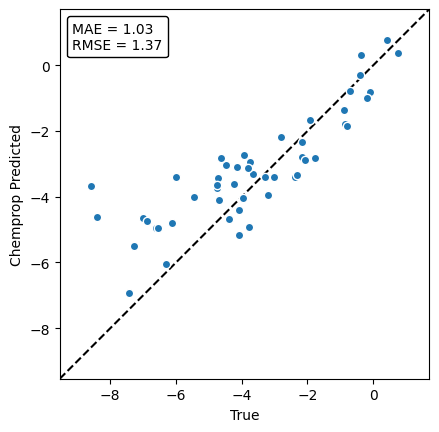

In [15]:
plot_parity(df.logSolubility, df.preds)

In [16]:
smiles = [['CCC'], ['CCCC'], ['OCC']]
arguments = [
    '--test_path', '/dev/null',
    '--preds_path', '/dev/null',
    '--checkpoint_dir', 'test_checkpoints_reg1'
]

args = chemprop.args.PredictArgs().parse_args(arguments)
preds = chemprop.train.make_predictions(args=args, smiles=smiles)

Loading training args


c:\Users\warun\anaconda3\envs\tensorflow\lib\site-packages\torch\utils\data\dataloader.py:560: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4 (`cpuset` is not taken into account), which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Setting molecule featurization parameters to default.
Loading data
Validating SMILES
Test size = 3


  0%|          | 0/1 [00:00<?, ?it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".


100%|██████████| 1/1 [00:43<00:00, 43.87s/it]

Saving predictions to /dev/null
Elapsed time = 0:00:45
